In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('1iris.csv')

X = df.iloc[:, [3, 4]].values


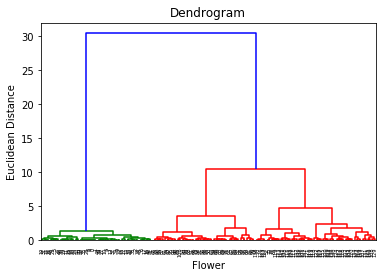

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendrogram')
plt.xlabel('Flower')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='group')
y_hc = hc.fit_predict(X)

ValueError: Unknown linkage type group. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])

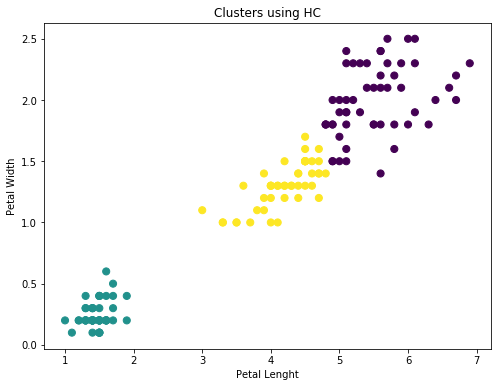

In [18]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

plt.title('Clusters using HC')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')
plt.show()

In [19]:
columns = ['Species']
from sklearn.preprocessing import LabelEncoder
def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df
df = encoder(df)

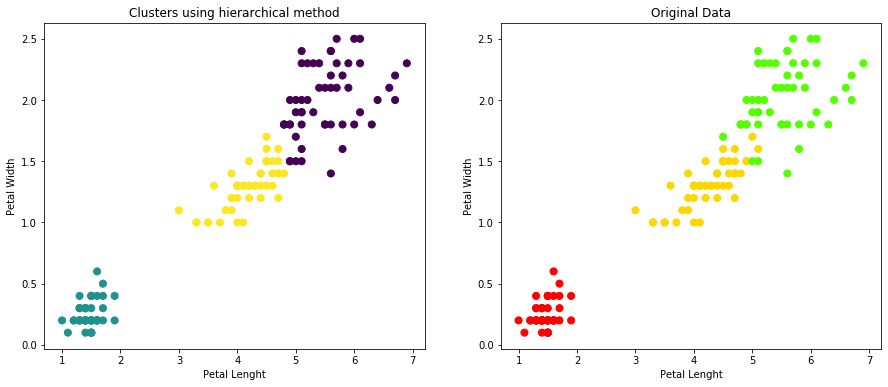

In [20]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title('Clusters using hierarchical method')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=df.iloc[:,5].values, s=50, cmap='prism')
plt.title('Original Data')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')
plt.show()